# Airline Passenger Satisfaction Data AnalysisNUR A'QILAH BINTI SUHAIMI (52224123216)

NIK NUR HUSNA BINTI NIK AHMED RAZANI (52224123376)

SHARIFAH ARLEENA BARAKBAH BINTI SYED ASWAD (52224123403)

## 1. Introduction
Customer satisfaction is a critical factor in the airline industry because it directly affects
customer loyalty, repeat purchases, and brand reputation. Airlines operate in a highly competitive
environment where passengers have many choices, making service quality a key differentiator.

This project applies data analytics and machine learning techniques to analyze airline passenger
survey data. The objective is to identify the most important factors that influence passenger
satisfaction, with a particular focus on service quality atributes.


## 2. Business Problem and Objectives

### 2.1 Business Problem
Airlines invest heavily in various service components such as seat comfort, in-flight entertainment,
food and beverages, and boarding processes. However, not all service improvements contribute equally
to passenger satisfaction. Without data-driven insights, airlines risk allocating resources to
areas that have minimal impact on customer experience.

### 2.2 Project Objectives
The objectives of this project are:
1. To explore passenger satisfaction patterns using exploratory data analysis (EDA).
2. To analyze the relationship between service quality attributes and passenger satisfaction.
3. To apply Random Forest modeling to identify the most important factors influencing satisfaction.
4. To provide business insights that support better service improvement decisions.

### 2.3 End Users of the Report
The main consumers of this report are airline management teams, customer experience and service quality managers and operational decision-makers. Data analysts and strategy teams in the airline industry might also use these insights to aid service optimization and long-term planning


## Import Required Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

sns.set(style="whitegrid")

## Load Dataset

In [2]:
df = pd.read_csv("airline_passenger_satisfaction.csv")

df.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

## 3. Dataset Description

The dataset was obtained from Kaggle and contains survey responses from airline passengers.
It includes demographic information, travel characteristics, service quality ratings, and
overall satisfaction labels.

The dataset contains 129,880 records and 24 attributes. After removing non-informative
attributes such as passenger ID, the remaining features were used for analysis.


##  Data Cleaning & Preparation

In [4]:
df.drop(columns=["ID"], inplace=True)

In [5]:
df.isnull().sum()

Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment                     0
Baggage Handling                  

In [6]:
df["Arrival Delay"] = df["Arrival Delay"].fillna(df["Arrival Delay"].median())

In [7]:
age_bins = [0, 18, 25, 35, 45, 55, 65, 100]
age_labels = ['<18', '18–25', '26–35', '36–45', '46–55', '56–65', '65+']

df["Age Group"] = pd.cut(df["Age"], bins=age_bins, labels=age_labels)

In [8]:
df["Satisfied"] = df["Satisfaction"].map({
    "Satisfied": 1,
    "Neutral or Dissatisfied": 0
})

## 4. Data Preparation

Data cleaning was performed to ensure reliable analysis. The passenger ID column was removed
because it does not contribute to satisfaction analysis. Missing values in the Arrival Delay
variable were handled using median imputation because delay data is typically skewed and may
contain extreme values.

The satisfaction variable was converted into a binary numerical format to support machine
learning mdeling.



## Exploratory Data Analysis (EDA)

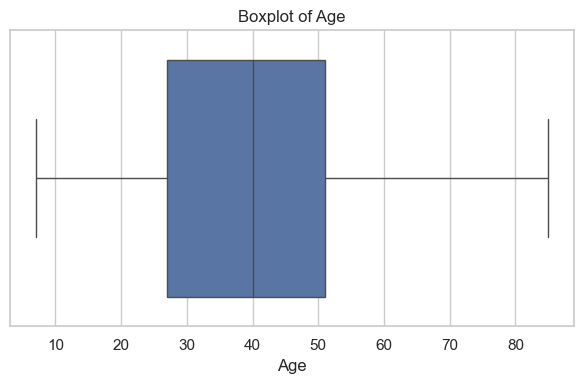

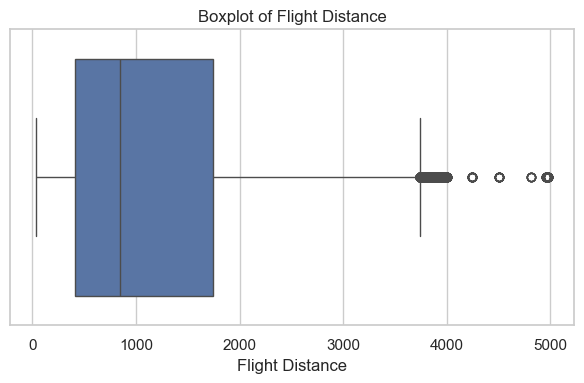

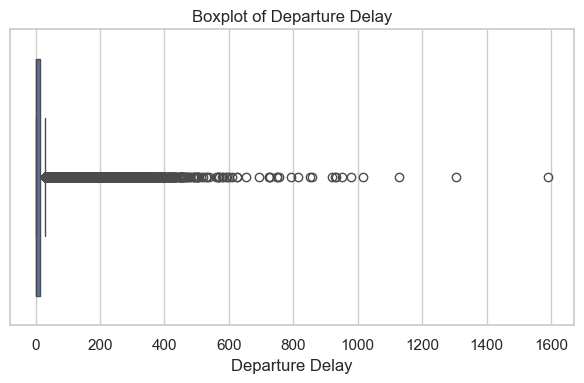

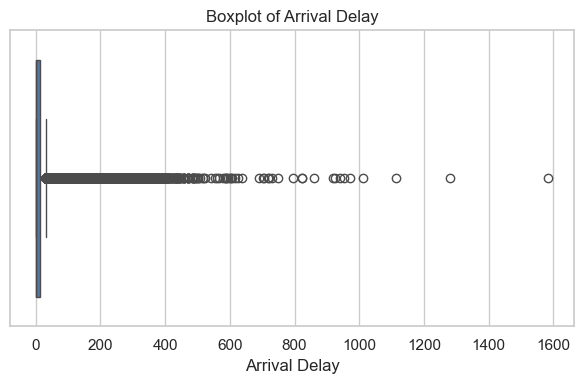

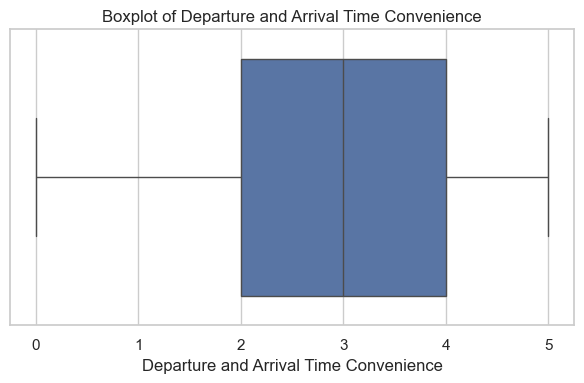

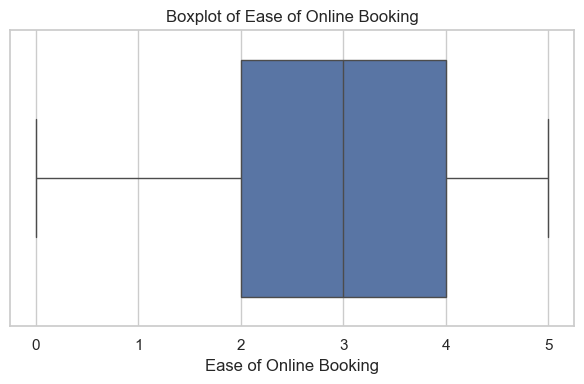

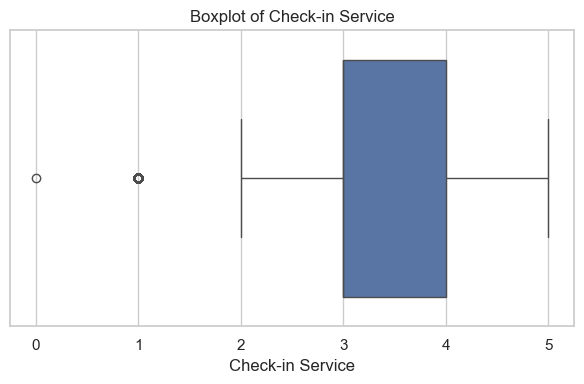

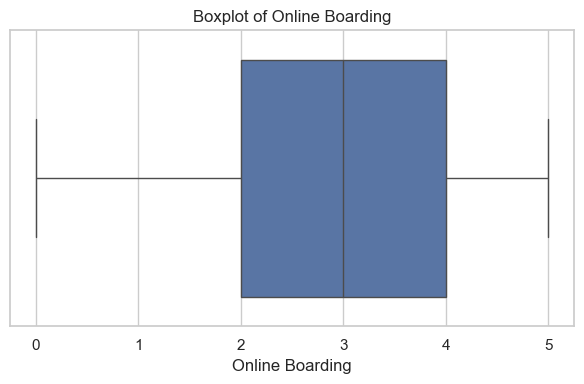

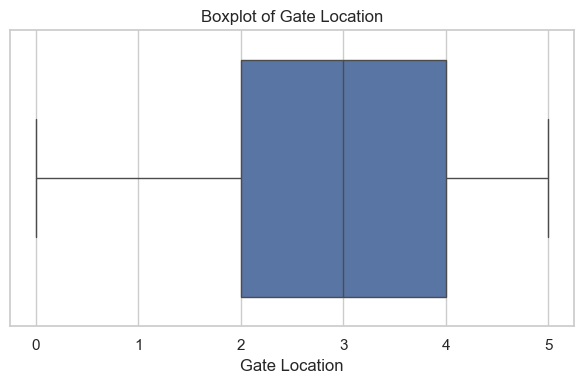

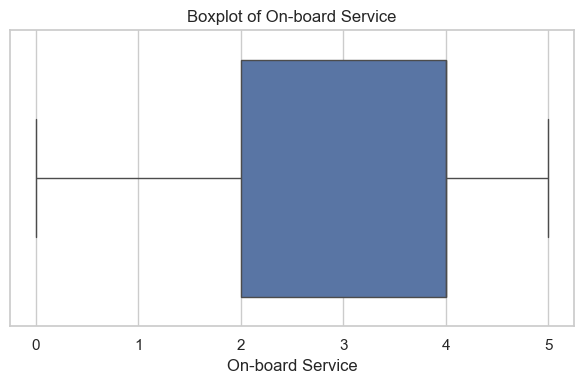

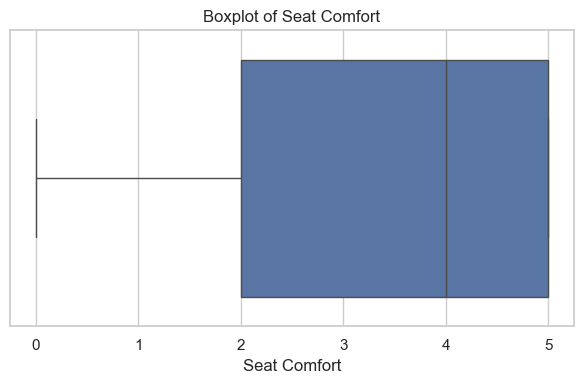

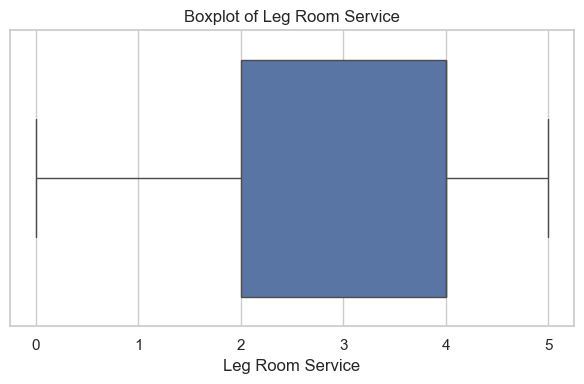

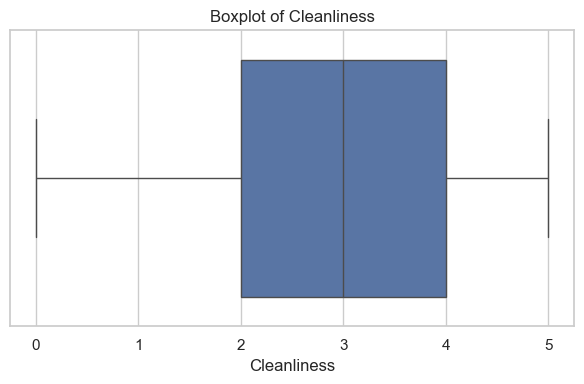

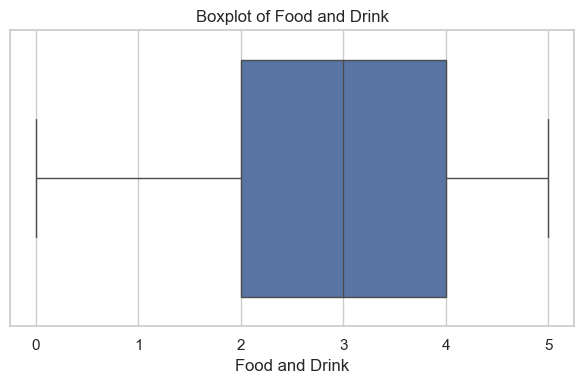

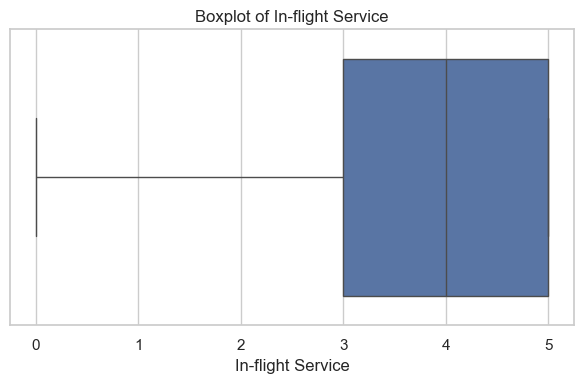

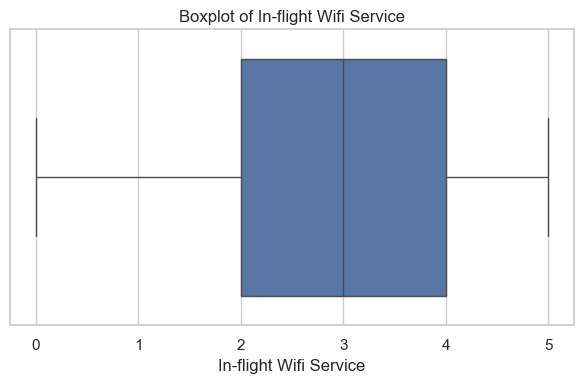

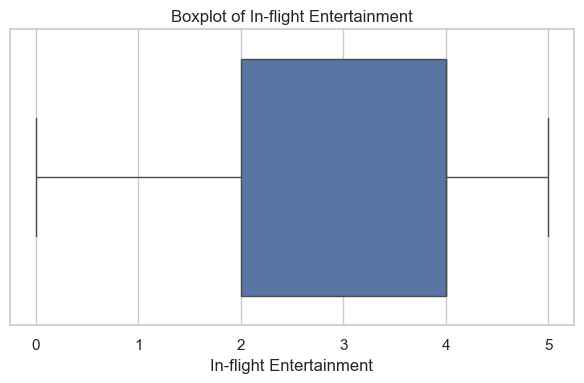

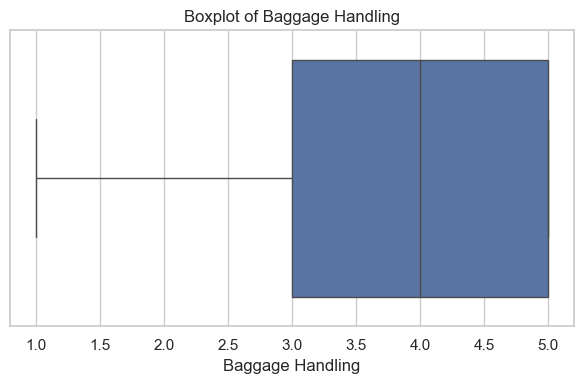

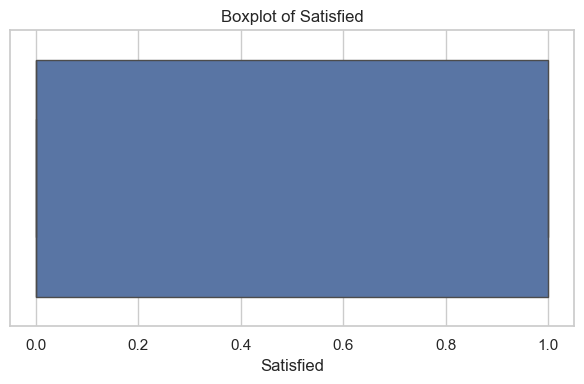

In [9]:
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.tight_layout()
    plt.show()

### Outlier Analysis 

The boxplots show the presence of outliers in several numerical variables, particularly
flight distance and both departure and arrival delays. These extreme values represent
real-world operational situations such as long-haul international flights and unexpected
flight delays caused by weather conditions, technical issues, or air traffic congestion.

Rather than removing these outliers, they were retained in the dataset because they
reflect actual passenger experiences. Removing them could reduce the realism of the
analysis and weaken the ability of the model to understand dissatisfaction caused by
severe delays. Therefore, the decision to keep these values helps preserve the integrity
and practical relevance of the dataset.


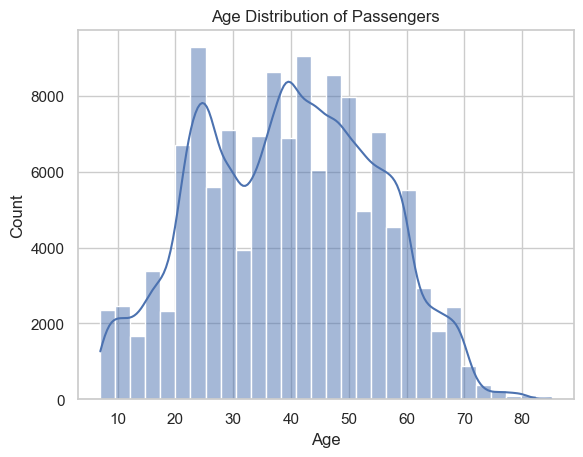

In [10]:
sns.histplot(df["Age"], bins=30, kde=True)
plt.title("Age Distribution of Passengers")
plt.show()


### Age Distribution Interpretation

A histogram of passenger age reveals that a majority of passengers belong to the age group of adults working age. This would indicate that most airline customers are economically active people, which is in line with actual airline travel patterns. The distribution is slightly right skewed, in that there are fewer elderly passengers than younger and middle aged groups.


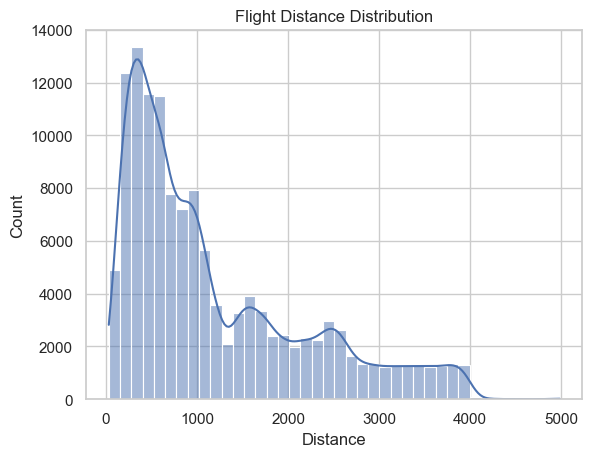

In [11]:
sns.histplot(df["Flight Distance"], bins=40, kde=True)
plt.title("Flight Distance Distribution")
plt.xlabel("Distance")
plt.ylabel("Count")
plt.show()

### Flight Distance Interpretation

The flight distance distribution shows a wide range of values, representing both short-
haul and long-haul flights. Most passengers travel shorter distances, while a smaller
proportion of passengers take long-distance flights.

The right-skewed shape of the distribution indicates that long-haul flights are less
common but still significant. These long-distance flights often involve longer travel
times and higher passenger expectations, which may influence satisfaction differently
compared to short-haul flights.


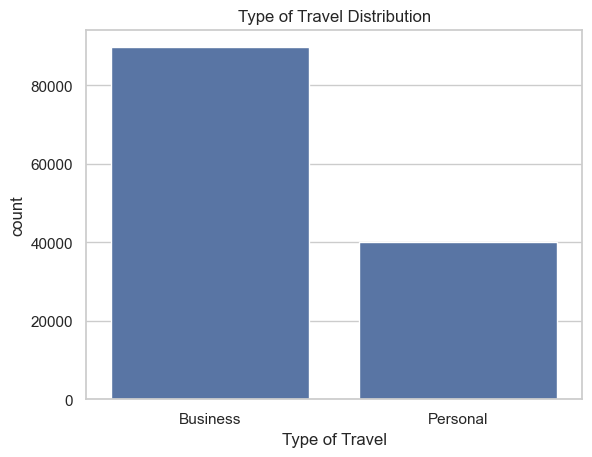

In [16]:
sns.countplot(x="Type of Travel", data=df)
plt.title("Type of Travel Distribution")
plt.show()


### Type of Travel Interpretation

The distribution of travel purpose shows that business travel is more common than
personal travel in the dataset. Business travelers often have different expectations,
such as punctuality, efficient boarding, and reliable in-flight services.

Because business travelers typically travel more frequently, their satisfaction levels
can have a strong impact on airline loyalty and long-term revenue. This makes it
important for airlines to focus on meeting the expectations of this group.


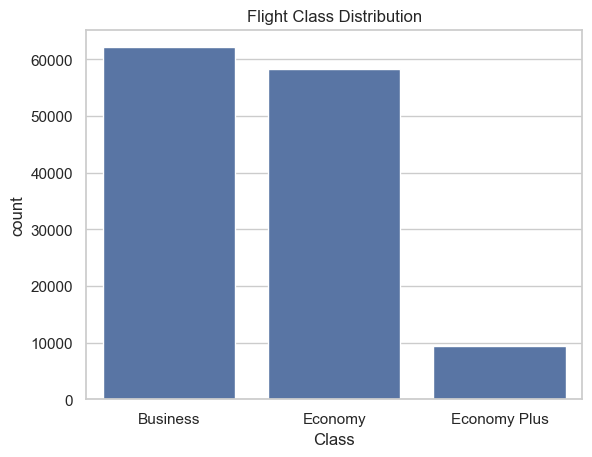

In [17]:
sns.countplot(x="Class", data=df)
plt.title("Flight Class Distribution")
plt.show()

### Flight Class Interpretation

The flight class distribution shows that most passengers travel in Business and Economy
classes, while Economy Plus represents a smaller portion of the dataset. This reflects
real-world airline seating structures, where premium and standard seats are more common
than intermediate classes.

Although Business class has the highest number of passengers in the dataset, passenger
count alone does not explain satisfaction. Further analysis is required to understand
how service quality interacts with travel class to influence satisfaction.


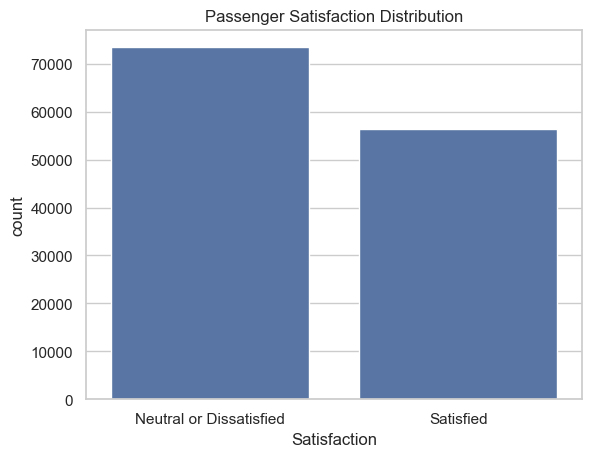

In [19]:
sns.countplot(x="Satisfaction", data=df)
plt.title("Passenger Satisfaction Distribution")
plt.show()

### Passenger Satisfaction Distribution Interpretation

The distribution of passenger satisfaction was displayed as a bar chart. The results shows that a larger proportion of passengers comes under the Neutral or Dissatisfied category compared to Satisfied passengers. This means that there is a slight imbalance in the target variable, which is important to keep in mind when interpreting the performance and accuracy of the model. From a business perspective, the high number
of neutral or dissatisfied passengers suggests an opportunity for airlines to improve
service quality and increase customer satisfaction.


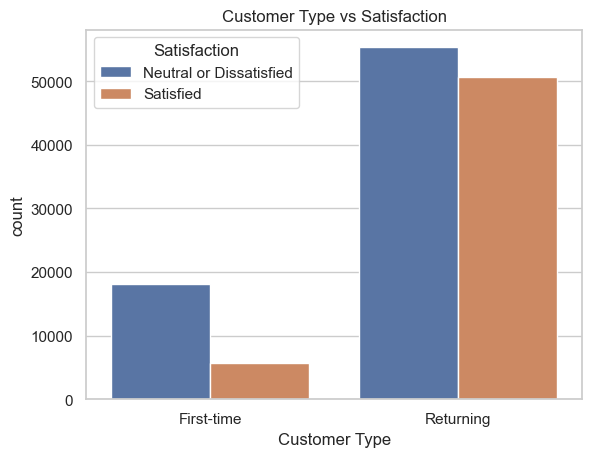

In [22]:
sns.countplot(x="Customer Type", hue="Satisfaction", data=df)
plt.title("Customer Type vs Satisfaction")
plt.show()

### Customer Type vs Satisfaction

The comparison between customer type and passenger satisfaction shows that returning
customers report higher satisfaction levels than first-time customers. This suggests
that familiarity with airline processes, previous positive experiences, and loyalty
benefits contribute to a better overall perception of the service.

First-time customers, on the other hand, display a higher proportion of neutral or
dissatisfied responses. This may be due to unmet expectations or unfamiliarity with
airline procedures. These results highlight the importance of consistent service quality
and effective onboarding experiences to improve satisfaction among new passengers.


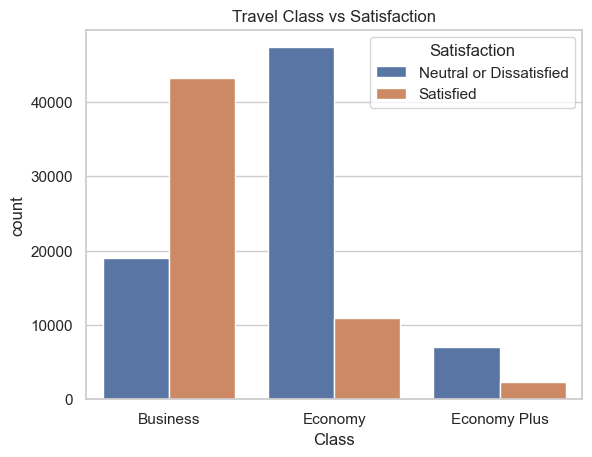

In [23]:
sns.countplot(x="Class", hue="Satisfaction", data=df)
plt.title("Travel Class vs Satisfaction")
plt.show()

In [39]:

class_satisfaction = (
    df.groupby("Class")["Satisfaction"]
    .value_counts(normalize=True)
    .rename("proportion")
    .reset_index()
)


class_satisfaction[class_satisfaction["Satisfaction"] == "Satisfied"]


,Class,Satisfaction,proportion
0,Business,Satisfied,0.694434
3,Economy,Satisfied,0.187673
5,Economy Plus,Satisfied,0.246414


### Travel Class vs Satisfaction

The comparison between travel class and passenger satisfaction shows a clear difference
across classes. Business class passengers have the highest satisfaction level, with
approximately 69% of passengers reporting that they are satisfied. This reflects the
higher level of comfort, space, and premium services offered in Business class.

In contrast, Economy and Economy Plus classes have much lower satisfaction proportions,
at around 19% and 25% respectively. This indicates that a large number of passengers in
lower classes remain neutral or dissatisfied. While travel class influences satisfaction,
these results suggest that service quality within each class plays an important role in
shaping passenger experience.



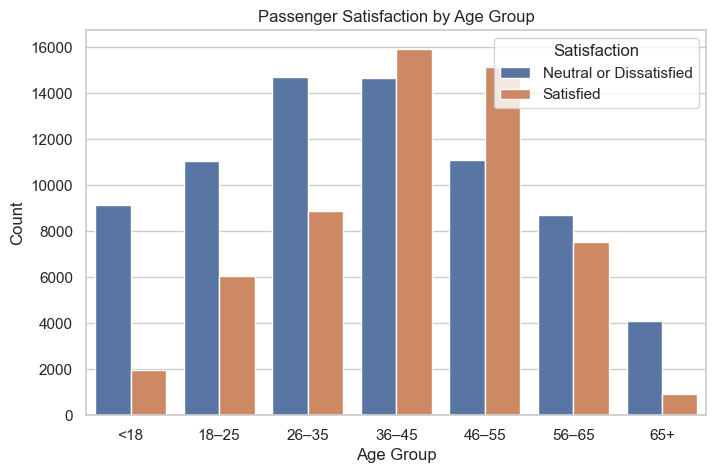

In [25]:
plt.figure(figsize=(8,5))
sns.countplot(x="Age Group", hue="Satisfaction", data=df)
plt.title("Passenger Satisfaction by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.show()

In [26]:
(df.groupby("Age Group")["Satisfied"].mean() * 100)

C:\Users\aqqaq\AppData\Local\Temp\ipykernel_4524\3766468455.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  (df.groupby("Age Group")["Satisfied"].mean() * 100)


Age Group
<18      17.615176
18–25    35.403146
26–35    37.642118
36–45    52.069112
46–55    57.784214
56–65    46.273254
65+      18.513380
Name: Satisfied, dtype: float64

### Passenger Satisfaction by Age Group

The results show that passenger satisfaction varies across age groups, with middle-aged
passengers reporting the highest satisfaction levels. Passengers aged 36–45 and 46–55
have satisfaction rates of approximately 52% and 58% respectively, suggesting that this
group may have more travel experience and more balanced expectations of airline services.

In contrast, younger passengers (below 25) and older passengers (65 and above) show much
lower satisfaction levels, with satisfaction rates below 35%. Younger travelers may have
higher service expectations, while older passengers may be more sensitive to comfort and
operational issues. These findings indicate that age influences satisfaction and that
different age groups may require different service strategies.


## Service Quality Analysis

In [27]:
service_features = [
    'Check-in Service',
    'Online Boarding',
    'Food and Drink',
    'Seat Comfort',
    'In-flight Wifi Service',
    'Cleanliness',
    'In-flight Entertainment'
]

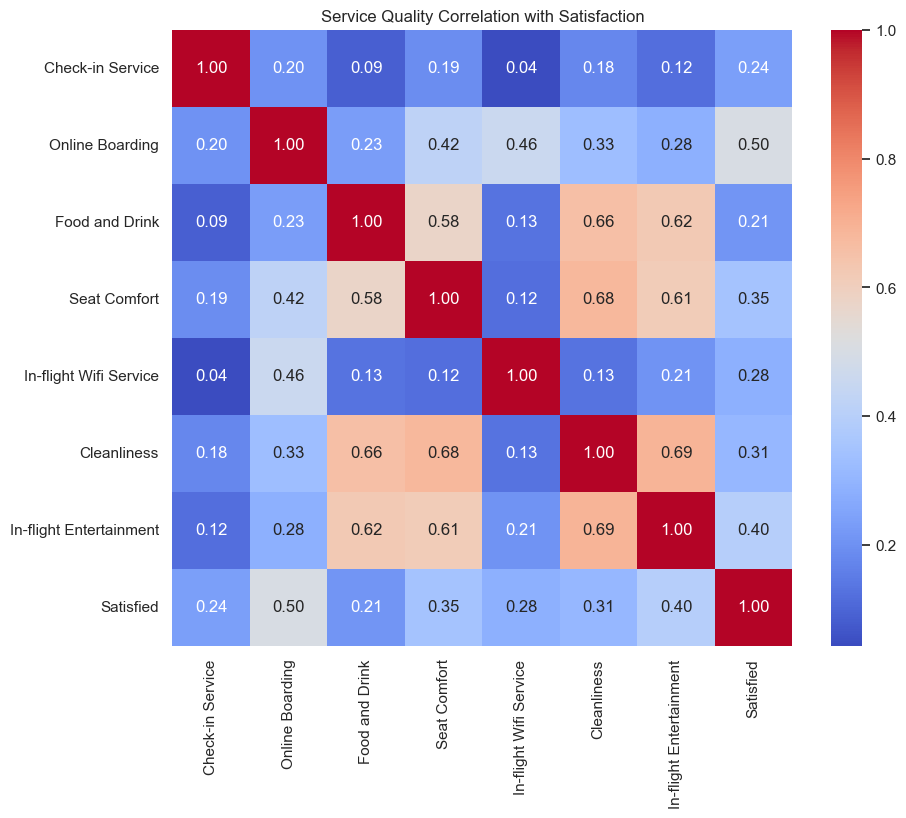

In [28]:
service_data = df[service_features + ["Satisfied"]]

plt.figure(figsize=(10,8))
sns.heatmap(
    service_data.corr(),
    annot=True,
    fmt=".2f",
    cmap="coolwarm"
)
plt.title("Service Quality Correlation with Satisfaction")
plt.show()


### Service Quality Correlation Interpretation

The correlation analysis shows that Online Boarding has the strongest positive
relationship with passenger satisfaction. This suggests that smooth and efficient
digital processes significantly improve the overall travel experience.

Other service attributes such as Seat Comfort, Inflight Entertainment, Cleanliness, and
Inflight Wi-Fi Service also show moderate to strong correlations with satisfaction.
These results indicate that comfort and operational efficiency are more influential
than basic amenities such as food and drink or check-in service.


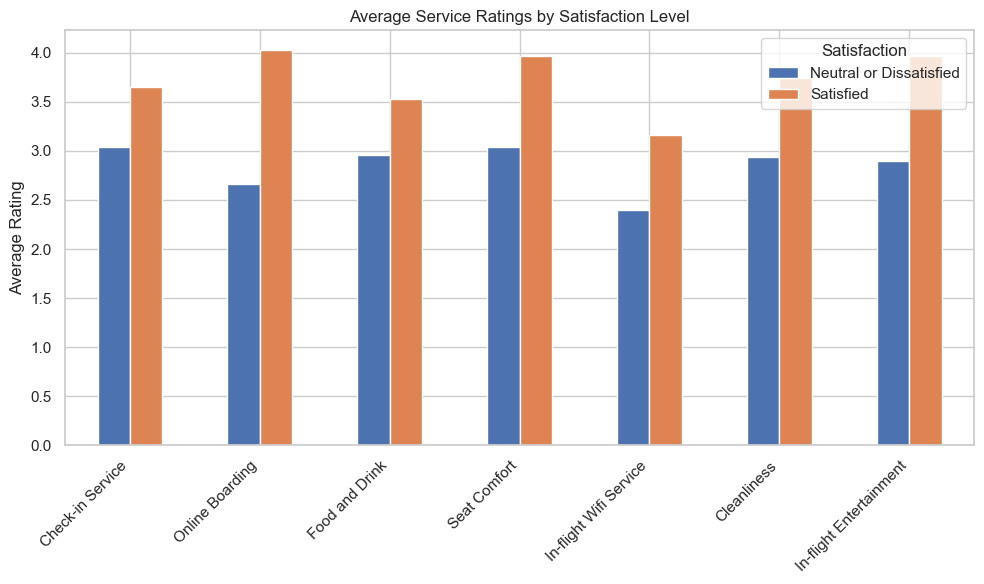

In [29]:
service_means = df.groupby("Satisfaction")[service_features].mean()

service_means.T.plot(kind="bar", figsize=(10,6))
plt.title("Average Service Ratings by Satisfaction Level")
plt.ylabel("Average Rating")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

### Average Service Rating Interpretation

The comparison of average service ratings between satisfied and neutral or dissatisfied
passengers shows a clear and consistent pattern. Satisfied passengers rate all service
attributes higher, with the largest differences observed in Online Boarding, Seat Comfort,
Inflight Entertainment, and Cleanliness.

These rating gaps indicate that improvements in these high-impact services are more likely
to lead to noticeable increases in passenger satisfaction. While other services such as
food and drink contribute to overall experience, they play a secondary role when compared
to comfort and efficiency-related services.


## Modeling Preparation

In [30]:
model_data = df.copy()

encoder = LabelEncoder()
for col in ["Gender", "Customer Type", "Class"]:
    model_data[col] = encoder.fit_transform(model_data[col])

y = model_data["Satisfied"]

## Model Comparison: With vs Without Service Quality

In [31]:
X_without = model_data[
    ['Gender', 'Customer Type', 'Age', 'Flight Distance', 'Class']
]

X_train_wo, X_test_wo, y_train_wo, y_test_wo = train_test_split(
    X_without, y, test_size=0.3, random_state=42, stratify=y
)

rf_without = RandomForestClassifier(random_state=42)
rf_without.fit(X_train_wo, y_train_wo)

acc_without = accuracy_score(y_test_wo, rf_without.predict(X_test_wo))


In [32]:
features_with_service = [
    'Gender', 'Customer Type', 'Age', 'Flight Distance', 'Class'
] + service_features

X_with = model_data[features_with_service]

X_train_w, X_test_w, y_train_w, y_test_w = train_test_split(
    X_with, y, test_size=0.3, random_state=42, stratify=y
)

rf_with = RandomForestClassifier(random_state=42)
rf_with.fit(X_train_w, y_train_w)

y_pred_w = rf_with.predict(X_test_w)
acc_with = accuracy_score(y_test_w, y_pred_w)


In [33]:
pd.DataFrame({
    "Model": ["Without Service Quality", "With Service Quality"],
    "Accuracy": [acc_without, acc_with]
})

,Model,Accuracy
0,Without Service Quality,0.703290
1,With Service Quality,0.935145


### Model Comparison: With vs Without Service Quality

Two Random Forest models were compared to evaluate the impact of service quality on
passenger satisfaction. The first model used only demographic and travel-related
variables and achieved moderate accuracy, showing that these factors alone are not
enough to fully explain satisfaction.

When service quality attributes were added, the model’s accuracy increased significantly.
This improvement confirms that service quality plays a major role in determining
passenger satisfaction. The results suggest that airlines should focus on improving
key service elements rather than relying only on travel class or passenger characteristics.


## Feature Importance Analysis

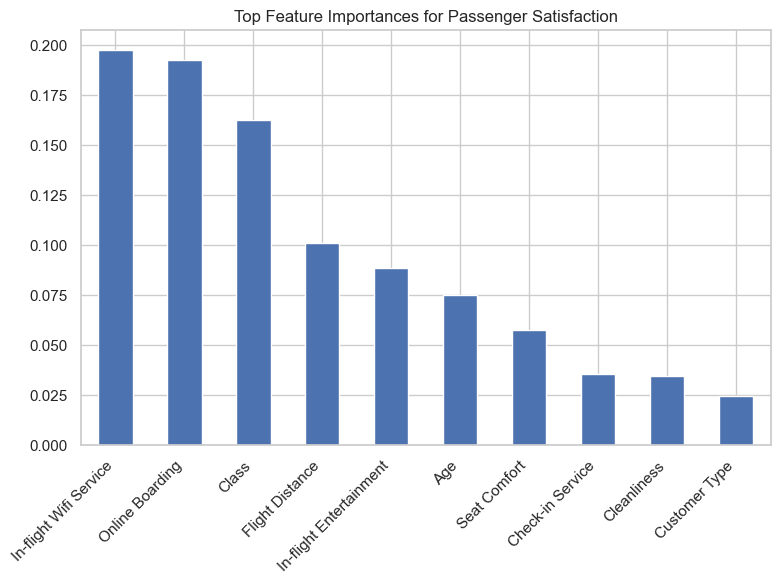

In [34]:
importance = pd.Series(
    rf_with.feature_importances_,
    index=features_with_service
).sort_values(ascending=False)

importance.head(10).plot(kind="bar", figsize=(8,6))
plt.title("Top Feature Importances for Passenger Satisfaction")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

### Feature Importance Analysis

Feature importance analysis was used to identify which variables contribute the most to
predicting passenger satisfaction in the Random Forest model. The results show that
service quality attributes are among the most influential factors.

Online Boarding and Inflight Wi-Fi Service rank as the top features, indicating that
efficient digital processes and reliable connectivity strongly affect passenger
satisfaction. The significance of Travel Class and Flight Distance are also high, indicating that both service experience and the features of a journey make a significant impact on the satisfaction results. Other important features include Seat Comfort, Inflight Entertainment,
and Travel Class, which highlight the role of comfort and overall travel experience.

Overall, the analysis confirms that service quality has a greater impact on passenger
satisfaction than demographic factors alone. This supports the conclusion that airlines
should prioritize improving key service features to enhance customer satisfaction.


## Model Evaluation 

In [35]:
y_prob = rf_with.predict_proba(X_test_w)[:,1]

print("Accuracy:", accuracy_score(y_test_w, y_pred_w))
print("ROC-AUC:", roc_auc_score(y_test_w, y_prob))
print(classification_report(y_test_w, y_pred_w))

Accuracy: 0.935145262293399
ROC-AUC: 0.982608661874314
              precision    recall  f1-score   support

           0       0.94      0.95      0.94     22036
           1       0.93      0.92      0.92     16928

    accuracy                           0.94     38964
   macro avg       0.93      0.93      0.93     38964
weighted avg       0.94      0.94      0.94     38964



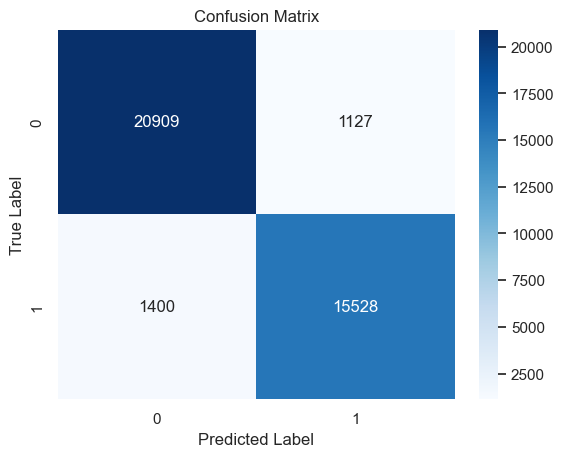

In [36]:
sns.heatmap(
    confusion_matrix(y_test_w, y_pred_w),
    annot=True,
    fmt="d",
    cmap="Blues"
)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### Random Forest Model Interpretation

The Random Forest model achieved high accuracy and strong ROC-AUC values, indicating that
it is effective in predicting passenger satisfaction. The significant improvement in
model performance after including service quality attributes confirms that these
attributes are critical drivers of satisfaction.

Feature importance analysis further supports this finding, as service-related variables
such as Online Boarding and Inflight Wi-Fi Service ranked higher than most demographic
and travel-related features. This demonstrates that service quality has a stronger
influence on satisfaction than passenger characteristics alone.


## Key Findings and Recommendations

This project aimed to analyze airline passenger satisfaction by exploring passenger
demographics, travel characteristics, and service quality attributes using data analytics
and machine learning techniques. Through exploratory data analysis, the results show that
satisfaction levels vary across different age groups, customer types, travel purposes,
and travel classes, fulfilling the objective of identifying satisfaction patterns among
passenger segments.

The service quality analysis addressed the second objective by showing that service-related
attributes such as online boarding, inflight Wi-Fi, seat comfort, inflight entertainment,
and cleanliness have a stronger relationship with passenger satisfaction than demographic
factors alone. These findings were further validated using Random Forest modeling, which
confirmed that including service quality variables significantly improves prediction
accuracy and that service quality features rank among the most important drivers of
satisfaction.

Based on these findings, airlines are recommended to prioritize improvements in high-impact
service areas, particularly digital processes and comfort-related services, rather than
relying only on travel class upgrades. By focusing on data-driven service improvements,
airlines can enhance customer satisfaction more effectively, improve customer loyalty, and
optimize operational costs in the long term.


Youtube Presentation Link: https://www.youtube.com/watch?v=uSqZbK_dmeM